In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2025-09-04 00:00:33.917933: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-04 00:00:34.021398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756924234.044672   47661 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756924234.055237   47661 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756924234.082813   47661 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70296 files belonging to 38 classes.


2025-09-04 00:01:15.628424: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-09-04 00:01:15.628446: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-09-04 00:01:15.628451: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: zer0-dellg155511
2025-09-04 00:01:15.628454: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: zer0-dellg155511
2025-09-04 00:01:15.628553: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 575.64.5
2025-09-04 00:01:15.628565: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] ker

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17581 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 88.    83.    80.  ]
   [ 89.75  84.75  81.75]
   [ 84.25  79.25  76.25]
   ...
   [ 80.25  73.25  67.25]
   [ 83.5   76.5   70.5 ]
   [ 76.5   69.5   63.5 ]]

  [[ 87.    82.    79.  ]
   [ 87.75  82.75  79.75]
   [ 84.75  79.75  76.75]
   ...
   [ 79.    72.    66.  ]
   [ 81.5   74.5   68.5 ]
   [ 84.5   77.5   71.5 ]]

  [[ 88.25  83.25  80.25]
   [ 90.    85.    82.  ]
   [ 93.    88.    85.  ]
   ...
   [ 86.    79.    73.  ]
   [ 81.75  74.75  68.75]
   [ 79.    72.    66.  ]]

  ...

  [[143.25 134.25 137.25]
   [141.75 132.75 135.75]
   [137.   128.   131.  ]
   ...
   [108.25  98.25  96.25]
   [109.25  99.25  97.25]
   [109.75  99.75  97.75]]

  [[135.75 126.75 129.75]
   [144.75 135.75 138.75]
   [141.5  132.5  135.5 ]
   ...
   [103.25  93.25  91.25]
   [108.5   98.5   96.5 ]
   [105.25  95.25  93.25]]

  [[142.   133.   136.  ]
   [137.25 128.25 131.25]
   [134.   125.   128.  ]
   ...
   [107.    97.    95.  ]
   [106.75  96.75  94.75]
   [108.25  98.25  9

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/home/zer0/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 888s 403ms/step - accuracy: 0.5923 - loss: 1.3840 - val_accuracy: 0.8344 - val_loss: 0.5337
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 875s 398ms/step - accuracy: 0.8564 - loss: 0.4560 - val_accuracy: 0.8915 - val_loss: 0.3479
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 874s 398ms/step - accuracy: 0.9110 - loss: 0.2730 - val_accuracy: 0.9315 - val_loss: 0.2133
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 876s 399ms/step - accuracy: 0.9367 - loss: 0.1913 - val_accuracy: 0.9429 - val_loss: 0.1855
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 920s 419ms/step - accuracy: 0.9531 - loss: 0.1435 - val_accuracy: 0.9349 - val_loss: 0.2079
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 973s 443ms/step - accuracy: 0.9632 - loss: 0.1132 - val_accuracy: 0.9526 - val_loss: 0.1533
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 906s 412ms/step - accuracy: 0.9711 - loss: 0.0901 - val_accuracy: 0.9600 - val_loss: 0.1354
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 892s 406ms/step - ac

In [20]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 241s 110ms/step - accuracy: 0.9898 - loss: 0.0300


In [21]:
print(train_loss,train_acc)

0.03003394789993763 0.9898002743721008


In [22]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 62s 113ms/step - accuracy: 0.9622 - loss: 0.1396


In [23]:
print(val_loss,val_acc)

0.13955768942832947 0.9621750712394714


In [77]:
model.save("trained_modela.keras")

In [25]:
training_history.history

{'accuracy': [0.5922669768333435,
  0.856350302696228,
  0.911004900932312,
  0.936738908290863,
  0.9530983567237854,
  0.9631558060646057,
  0.9710509777069092,
  0.9752333164215088,
  0.9787612557411194,
  0.9827017188072205],
 'loss': [1.3840173482894897,
  0.4560158848762512,
  0.27295809984207153,
  0.19133873283863068,
  0.1435285210609436,
  0.11321062594652176,
  0.0900631919503212,
  0.07476244866847992,
  0.06518513709306717,
  0.05352025479078293],
 'val_accuracy': [0.8343666195869446,
  0.8914737701416016,
  0.9314600825309753,
  0.9429497718811035,
  0.9348728656768799,
  0.9526193141937256,
  0.9599567651748657,
  0.9402764439582825,
  0.9547238349914551,
  0.9621750712394714],
 'val_loss': [0.5336598753929138,
  0.3479461073875427,
  0.213279128074646,
  0.18553803861141205,
  0.20789524912834167,
  0.1532580852508545,
  0.135442852973938,
  0.21828095614910126,
  0.16148443520069122,
  0.1395576298236847]}

In [26]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [27]:
training_history.history['val_accuracy']

[0.8343666195869446,
 0.8914737701416016,
 0.9314600825309753,
 0.9429497718811035,
 0.9348728656768799,
 0.9526193141937256,
 0.9599567651748657,
 0.9402764439582825,
 0.9547238349914551,
 0.9621750712394714]

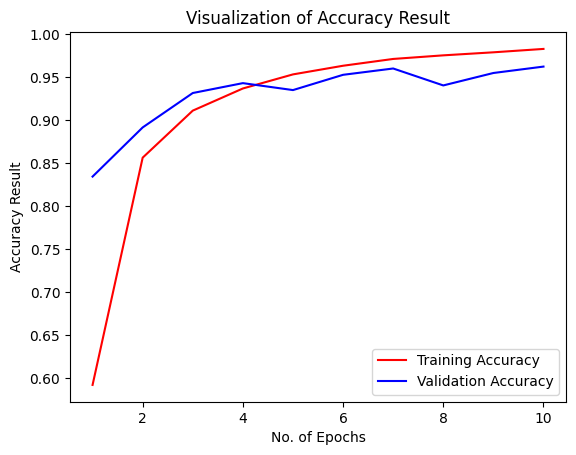

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17581 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step


(array([[9.9999821e-01, 1.9184147e-07, 7.3696596e-12, ..., 1.4369012e-17,
         4.9322143e-17, 4.7887160e-17],
        [9.9998546e-01, 8.8032230e-06, 9.1773165e-11, ..., 1.3004911e-15,
         1.0529735e-14, 7.1655462e-16],
        [1.0000000e+00, 1.9850599e-09, 1.7805056e-10, ..., 2.7064620e-18,
         5.2026172e-16, 1.8293036e-15],
        ...,
        [4.3610506e-12, 6.8106235e-15, 2.8908793e-09, ..., 3.0829365e-12,
         2.0781545e-14, 9.9999988e-01],
        [2.6400832e-10, 2.3476546e-14, 1.1107155e-09, ..., 6.8522674e-11,
         5.4851712e-13, 9.9999988e-01],
        [1.1428765e-16, 3.9626819e-18, 1.0450249e-15, ..., 3.1422823e-18,
         1.3699380e-16, 1.0000000e+00]], dtype=float32),
 (17581, 38))

In [39]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

2025-09-04 02:46:15.714274: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17581, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17581,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.95       504
                                 Apple___Black_rot       0.96      0.99      0.98       498
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.88      0.99      0.94       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       479
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [44]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[466,   6,   0, ...,   0,   1,   0],
       [  0, 492,   0, ...,   0,   0,   0],
       [  0,   0, 428, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 440,   0],
       [  0,   0,   1, ...,   0,   0, 473]])

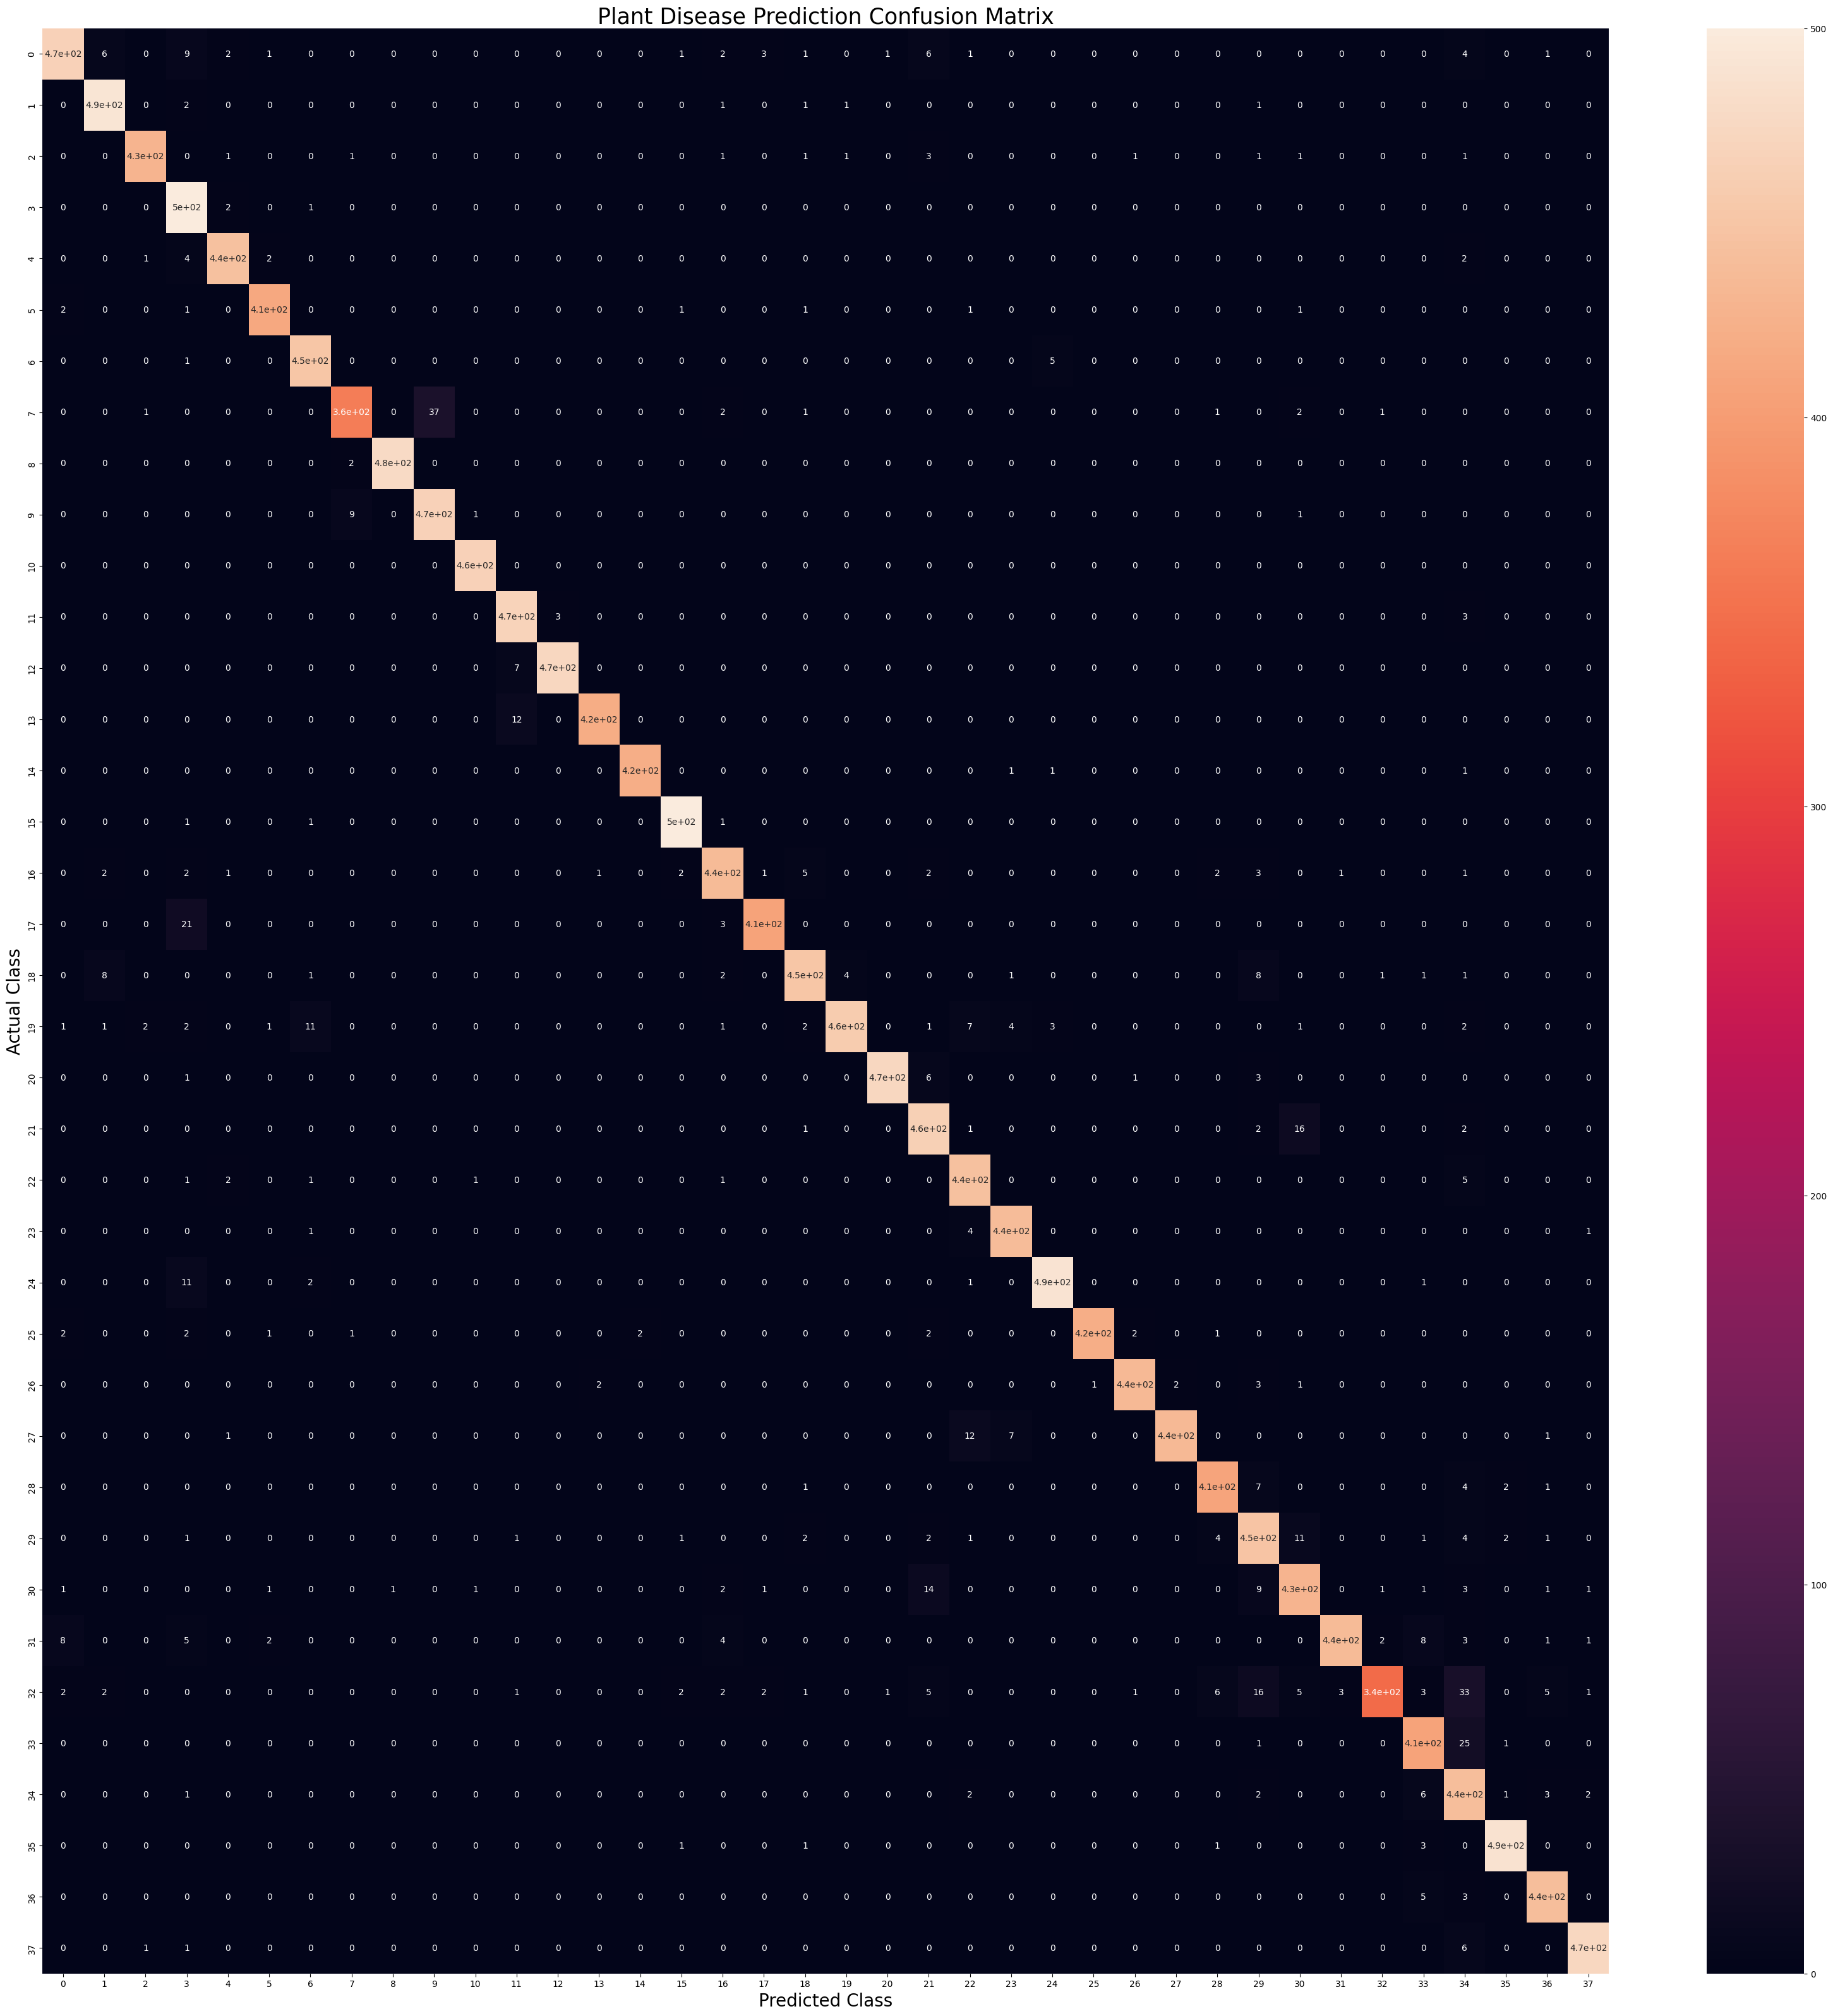

In [45]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [49]:
model  = tf.keras.models.load_model('trained_modela.keras')

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

In [51]:
!pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (67.0 MB)
Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]m 1/2 [opencv-python]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatibl

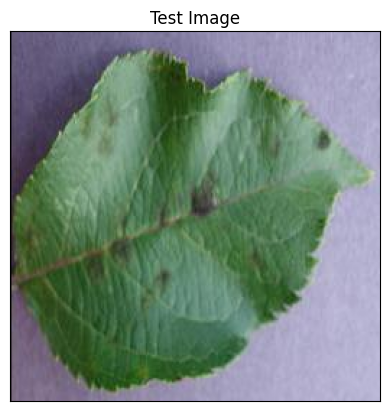

In [71]:
import cv2
image_path = "valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [72]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [73]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(array([[9.9999022e-01, 7.2001549e-06, 9.4036001e-11, 5.3040559e-08,
         1.4232289e-11, 2.0617685e-11, 2.9989811e-14, 3.7766970e-11,
         2.8380789e-14, 1.5720854e-13, 1.6002552e-15, 1.0913757e-14,
         1.6583624e-15, 1.1850186e-17, 4.4374584e-11, 3.0457581e-12,
         2.1018898e-09, 1.9761638e-12, 2.2682179e-11, 6.7553446e-14,
         2.4175641e-08, 2.4661897e-06, 2.6154487e-10, 3.9349026e-15,
         1.2446976e-12, 3.0262279e-11, 4.8032227e-13, 2.2560377e-11,
         1.3875271e-13, 4.1792778e-09, 6.9279305e-13, 2.7754127e-15,
         4.7121113e-12, 1.4447227e-16, 9.0752302e-12, 7.3002474e-17,
         2.7332896e-16, 1.2030380e-16]], dtype=float32),
 (1, 38))

In [74]:
result_index = np.argmax(prediction)
result_index

0

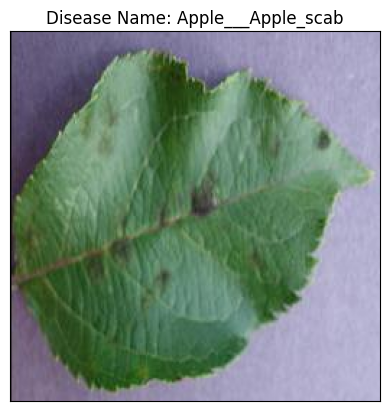

In [75]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [76]:
model_prediction

'Apple___Apple_scab'